**<h3><center>EN2550 Assignment 1 on Intensity Transformations and Neighborhood
Filtering</center></h3>**
*Name - Ekanayake E.M.S.S.N.*
<br>
*Index no - 190164M*
<br>
Github - https://github.com/SevinduEk/Assignment1_EN2550
<br>
***This report only contains the important parts of codes**
<hr>


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

**(01)**

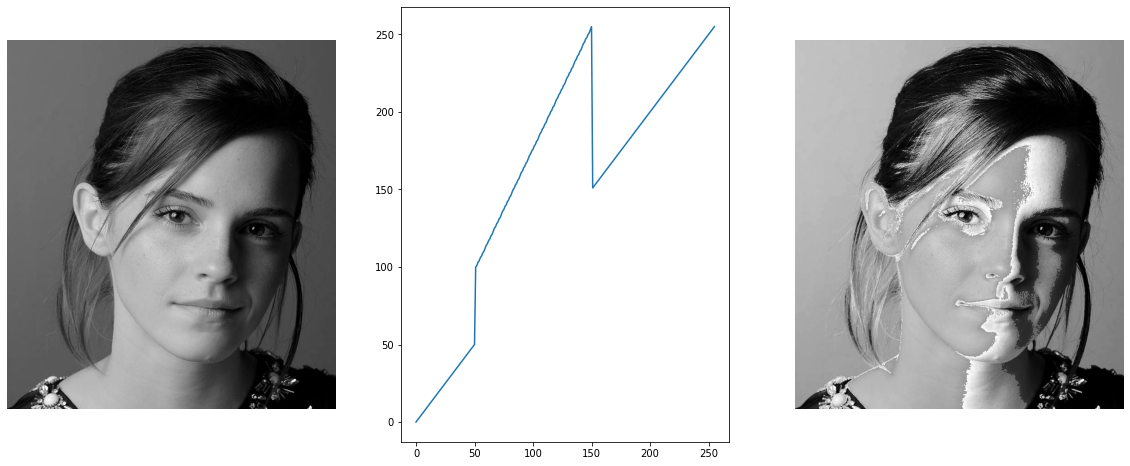

In [135]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(51,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(151,255,105)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)

g = cv.LUT(f, t)



By looking at the intensity transformation, we can say that it has an identity behaviour in the (0,50) and (150,255) regions. But pixels in the (50,150) region are mapped to a brighter value (by an increasing function). So that brightest areas(left side of face) and darkest areas(hair and shadows) stay the same while other areas turn lighter than before.

**(02)**

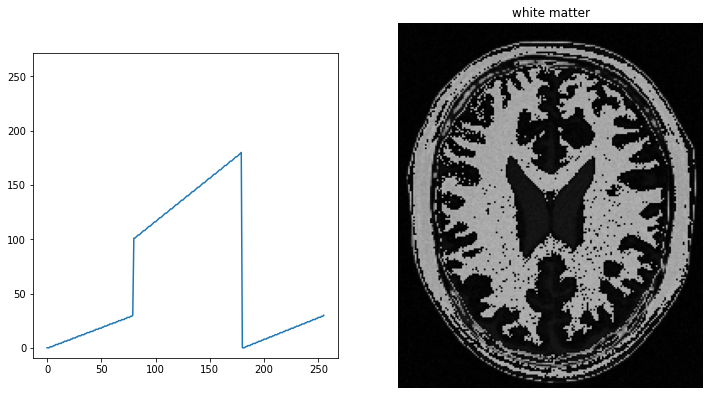

In [123]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,30,80)
t2 = np.linspace(31,100,0)
t3 = np.linspace(101,180,100)
t4 = np.linspace(0,30,76)

t = np.concatenate((t1,t2,t3,t4), axis=0).astype(np.uint8)

g = cv.LUT(f, t)


Roughly, white matter areas do have the pixel values around 80-180. To highlight those areas, we need to map pixels that are in the 80-180 range to a brighter value and map other pixels to a darker value (as shown in the Lookup table).

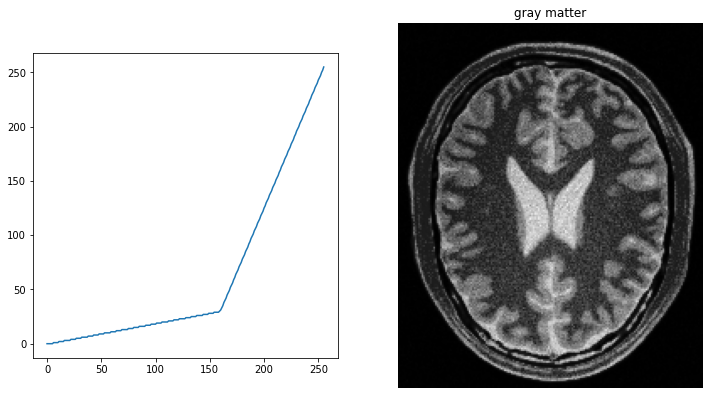

In [114]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,30,160)
t2 = np.linspace(31,255,96)

t = np.concatenate((t1,t2), axis=0).astype(np.uint8)

g = cv.LUT(f, t)


Compared to other areas, gray matter are the brightest areas in the given image. So we need to map bright pixels to a more brighter values. Mapping dark pixels to a more darker value helps to highlight the brighter areas.

**(03)**

Text(0.5, 1.0, 'Gamma corrected')

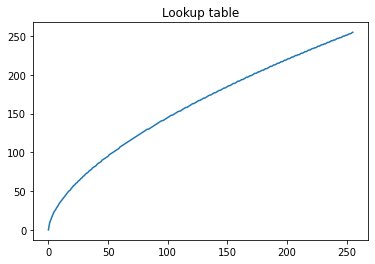

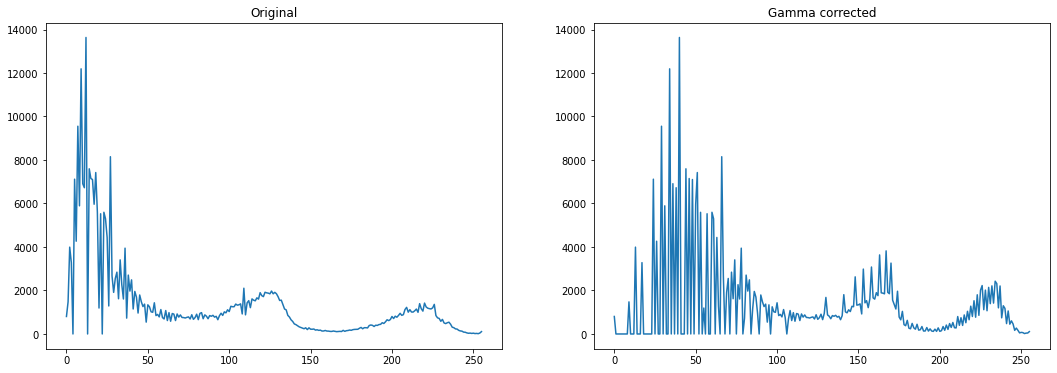

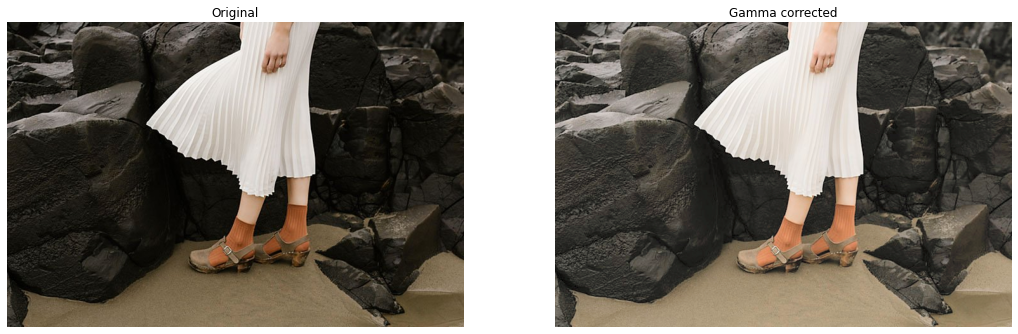

In [60]:
f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert f is not None

orig = cv.cvtColor(f,cv.COLOR_BGR2RGB)
lab = cv.cvtColor(f,cv.COLOR_BGR2Lab)
L, a, b = cv.split(lab)
gamma = 0.6
t = np.array([(p/255.0)**(gamma)*255.0 for p in range (0,256)]).astype('uint8')

g = cv.LUT(L, t)
lab_orig = cv.cvtColor(f,cv.COLOR_BGR2Lab)
lab[:,:,0] = g

img = cv.cvtColor(lab, cv.COLOR_Lab2RGB).astype('uint8')
hist_orig = cv.calcHist([lab_orig],[0],None,[256],[0,256])
hist_gamma = cv.calcHist([lab],[0],None,[256],[0,256])


in L*a*b color space, L stands for Lightness, which relates to the amplitude of the colour (the quality of being pale in colour). From gamma correction, we have mapped the pixels as shown in the lookup table graph. Overall lightness of the image has been increased. Lightness of darker areas has increased than in the lighter areas.(Compare the stones and the frock)

**(04)**

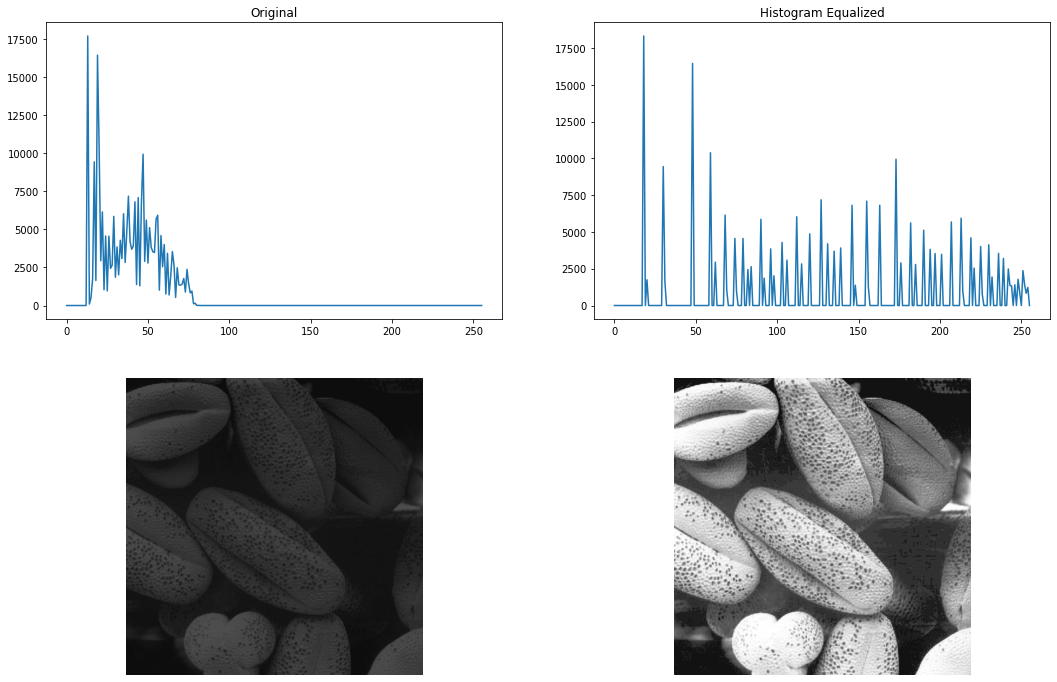

In [80]:
def Calc_hist(im):
    count = np.zeros(256)
    for i in range (im.shape[1]):
        for j in range(im.shape[0]):
            count[im[i][j]] += 1.
    return(count)

def Cumulative_sum(arr):
    cdf = arr[:]
    for i in range(len(cdf)):
        if i==0:
            continue
        else:
            cdf[i] += cdf[i-1] 
    return cdf

def equalize(f):
    height,width = f.shape
    hist = Calc_hist(f)
    fig, ax = plt.subplots(2,2, figsize=(18,12))
    ax[0,0].plot(hist)
    ax[0,0].set_title('Original')

    cdf = Cumulative_sum(hist)
    normalized = cdf*255/(height*width)

    g = cv.LUT(f,normalized).astype('uint8')
    eq_hist = Calc_hist(g)

    ax[0,1].plot(eq_hist)
    ax[0,1].set_title('Histogram Equalized')
    ax[1,0].imshow(f, cmap='gray',vmin=0,vmax=255)
    ax[1,0].axis('off')
    ax[1,1].imshow(g, cmap='gray',vmin=0,vmax=255)
    ax[1,1].axis('off')


f = cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None

equalize(f)


Histogram equalization means adjusting the contrast of an image by using its histogram. It spreads the frequencies of the pixels between 0 and 255. In order to do that, we have to take, $$\frac{c.d.f*255}{total\,no.\,of\,pixels}$$ In enhanced image, frequent dark color pixel values spread have out in full range of the image.

**(05)**

**(a)**

In [248]:
def zoom(f):
    s=4
    rows, cols = f.shape[0]*s , f.shape[1]*s

    zoomed = np.zeros((rows,cols,3))
    for i in range(rows):
        for j in range(cols):
            zoomed[i][j] = f[min(f.shape[0]-1,round(i/s))][min(f.shape[1]-1,round(j/s))]

    zoomed = zoomed.astype('uint8')
    return zoomed

f = cv.imread(r'a1q5images\a1q5images\im01small.png',cv.IMREAD_COLOR)
g = cv.imread(r'a1q5images\a1q5images\im01.png',cv.IMREAD_COLOR)
assert f is not None

zoomed = zoom(f)
s = np.sum((g[:,:,0:3]-zoomed[:,:,0:3])**2)/(zoomed.shape[0]*zoomed.shape[1]*zoomed.shape[2])
print("Normalized ssd of method (a) = " + str(s))


Normalized ssd of method (a) = 40.11174270190329


In [249]:
f = cv.imread(r'a1q5images\a1q5images\im02small.png',cv.IMREAD_COLOR)
g = cv.imread(r'a1q5images\a1q5images\im02.png',cv.IMREAD_COLOR)

zoomed = zoom(f)
s = np.sum((g[:,:,0:3]-zoomed[:,:,0:3])**2)/(zoomed.shape[0]*zoomed.shape[1]*zoomed.shape[2])
print("Normalized ssd of method (a) = " + str(s))


Normalized ssd of method (a) = 16.792970920138888


In [250]:
f = cv.imread(r'a1q5images\a1q5images\im03small.png',cv.IMREAD_COLOR)
g = cv.imread(r'a1q5images\a1q5images\im03.png',cv.IMREAD_COLOR)
assert f is not None

zoomed = zoom(f)


*Pictures are at the bottom*

In the nearest-neighbour method, first an array is created with desired image width and height. After that each pixel is mapped to a pixel in the original image. For an example, if we zoom in a 100x100 image 4 times, and we need to calculate the 150th pixel value in the zoomed in image, we take the 150/4th pixel value in the original image. Since these fractions can return float values, round function is used to round them to the nearest integer. Also we need to clip those values to original image width and height to make sure that we don't get any non-existing pixel values. 
SSD is an indication of the difference between two images. So, larger the SSD value becomes, quality of the zooming in process becomes lower.
*(Size for the 3rd image doesn't match with the 4xzoomed image)*

**(b)**

In [251]:
def zoom_b(f):
    s=4
    rows, cols = f.shape[0]*s , f.shape[1]*s

    zoomed = np.zeros((rows,cols,3))
    for i in range(rows):
        for j in range(cols):
            floor_x = math.floor(i/s) 
            floor_y = math.floor(j/s)
            q1 = f[floor_x][floor_y]
            q2 = f[min(floor_x+1,f.shape[0]-1)][floor_y]
            q3 = f[floor_x][min(floor_y+1,f.shape[1]-1)]
            q4 = f[min(floor_x+1,f.shape[0]-1)][min(floor_y+1,f.shape[1]-1)]
       
            r1 = q1*(i/s - floor_x) + q2*(1 - i/s + floor_x)
            r2 = q3*(i/s - floor_x) + q4*(1 - i/s + floor_x)
            r3 = r1*(j/s - floor_y) + r2*(1 - j/s + floor_y)

            zoomed[i,j,:] = r3
    return zoomed.astype(np.uint8)

In [252]:
f = cv.imread(r'a1q5images\a1q5images\im01small.png',cv.IMREAD_COLOR)
g = cv.imread(r'a1q5images\a1q5images\im01.png',cv.IMREAD_COLOR)
assert f is not None

zoomed = zoom_b(f)
s = np.sum((g[:,:,0:3]-zoomed[:,:,0:3])**2)/(zoomed.shape[0]*zoomed.shape[1]*zoomed.shape[2])
print("Normalized ssd of method (b) = " + str(s))


Normalized ssd of method (b) = 50.66079282407407


In [253]:
f = cv.imread(r'a1q5images\a1q5images\im02small.png',cv.IMREAD_COLOR)
g = cv.imread(r'a1q5images\a1q5images\im02.png',cv.IMREAD_COLOR)
assert f is not None

zoomed = zoom_b(f)
s = np.sum((g[:,:,0:3]-zoomed[:,:,0:3])**2)/(zoomed.shape[0]*zoomed.shape[1]*zoomed.shape[2])
print("Normalized ssd of method (a) = " + str(s))

Normalized ssd of method (a) = 22.207302806712963


In [254]:
f = cv.imread(r'a1q5images\a1q5images\im03small.png',cv.IMREAD_COLOR)
g = cv.imread(r'a1q5images\a1q5images\im03.png',cv.IMREAD_COLOR)
assert f is not None

zoomed = zoom_b(f)

In bilinear interpolation, pixels are not directly mapped into the original image's pixels. We define 4 locations that are around the exact scaled location. Then we do bilinear interpolation to find out the RGB values that should contain in that location in the zoomed in image. Its SSD values are higher. 

**(06)**

**(a)**

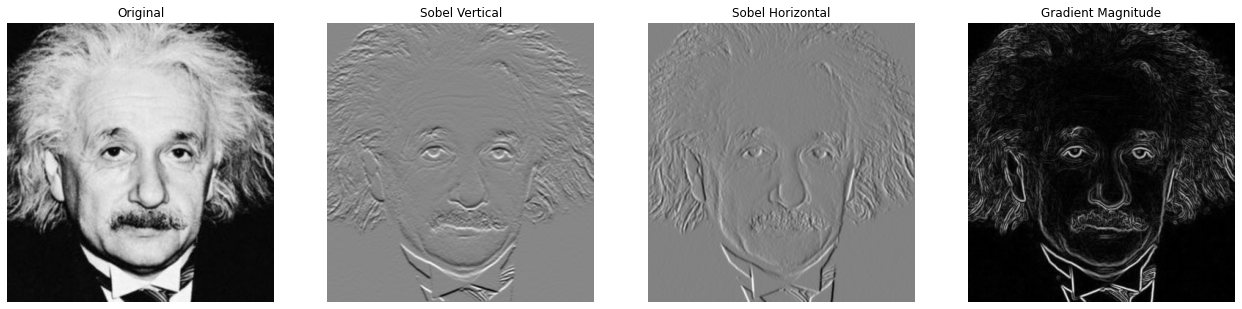

In [186]:
f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
f_x = cv.filter2D(f, -1, sobel_v)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')
f_y = cv.filter2D(f, -1, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)


Sobel filters are used to detect horizontal and vertical edges of an image. filter2D function is used to do the 2d convolution between the sobel kernel and the image. In the 2nd image, we can see that the edges in y direction has been highlighted. In the 3rd image, edged in the x direction are highlighted. Gradient magnitude gives the combined magnitude of horizontal and vertical edge magnitudes, which is shown in the 4th image. 

**(b)**

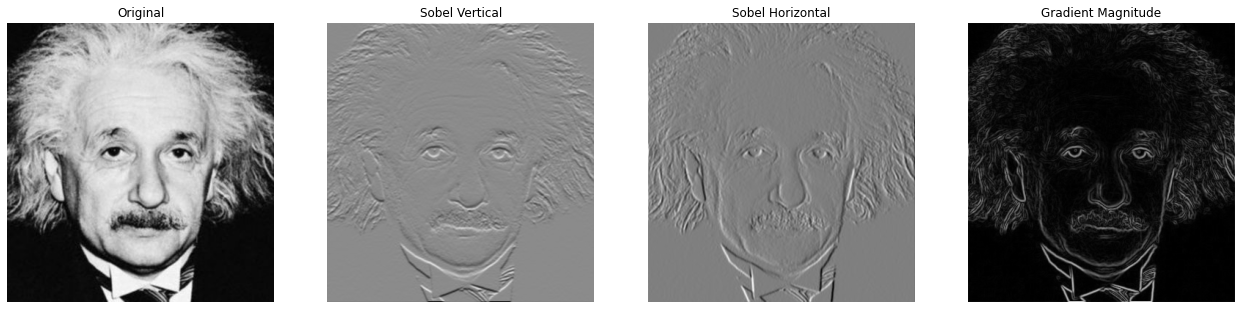

In [43]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
rows, cols = f.shape[0] , f.shape[1]

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')
grad = np.sqrt(f_x**2 + f_y**2)

padded = np.zeros((rows+2,cols+2))
for i in range(rows):
    for j in range(cols):
        padded[i+1,j+1] = f[i,j]

f_x = convolution2d(padded, sobel_v)
f_y = convolution2d(padded, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)



In this process, first we have to zero pad the image with one zero (because kernal is 3x3). After that, convloution needs to be done. Above defined convolution2d function does that process. 

**(c)**

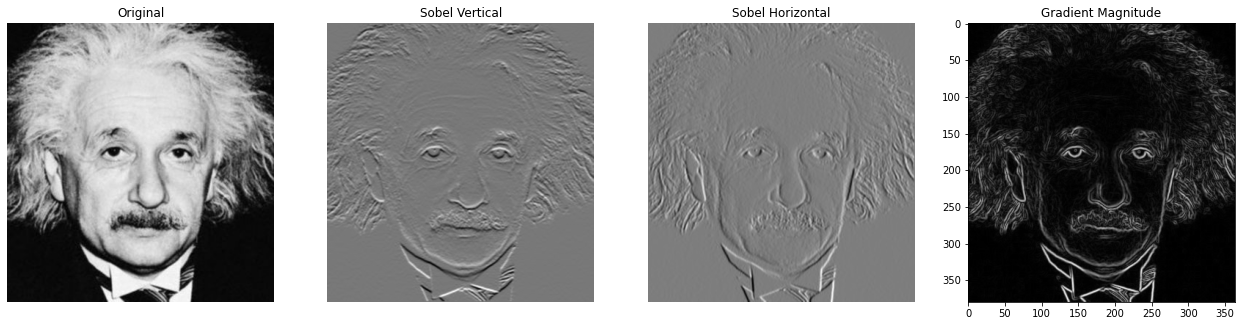

In [136]:
f = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_h1 = np.array([[1],[2],[1]], dtype='float')
sobel_h2 = np.array([[1,0,-1]],dtype='float')
sobel_v1 = np.array([[-1],[0],[1]], dtype='float')
sobel_v2 = np.array([[-1,-2,-1]],dtype='float')
f_y1 = cv.filter2D(f, -1, sobel_h1)
f_y2 = cv.filter2D(f_y1, -1, sobel_h2)
f_x1 = cv.filter2D(f, -1, sobel_v1)
f_x2 = cv.filter2D(f_x1, -1, sobel_v2)
grad = np.sqrt(f_x2**2 + f_y2**2)



Convolution is an associative process. So we can first do it one after one. We can see that if we first filtered the image with sobel_v1 and filter the result using sobel_v2, (same for horizontal sobel) it gives the same results as above.  

**(07)**

**(a)**

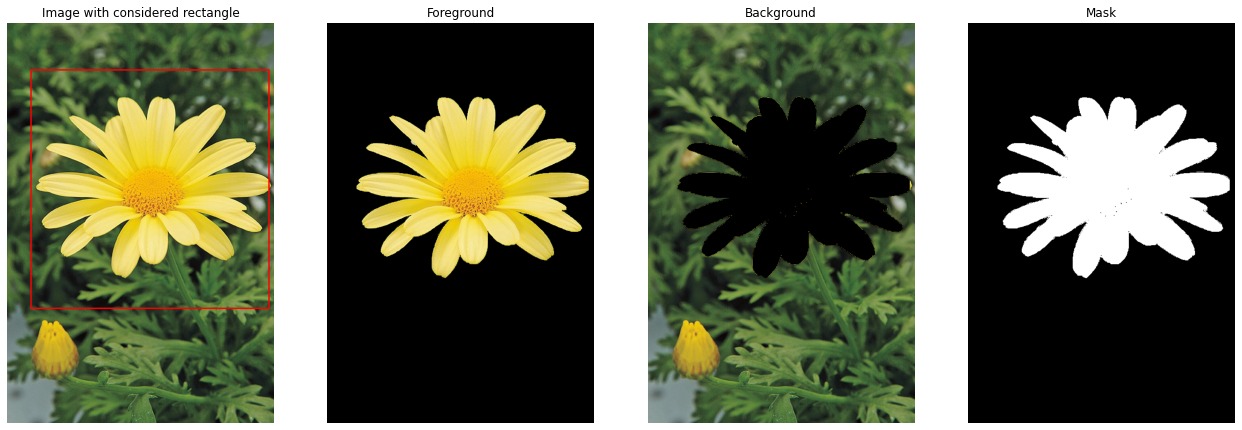

In [138]:
im = cv.imread(r'daisy.jpg')
orig = cv.imread(r'daisy.jpg')
orig = cv.cvtColor(orig, cv.COLOR_BGR2RGB)
mask = np.zeros(im.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,100,500,500)
cv.grabCut(im,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
FG = im*mask2[:,:,np.newaxis]
BG = np.subtract(im,FG)
area = cv.rectangle(orig,(50,100),(550,600),(255,0,0),2)


**(b)**

GrabCut is an image segmentation method based on graph cuts. When we give the range within the red rectangle, it seperates the flower from its background. The mask used to that is shown in the figure 4. Mask allows the pixels in the white area to remain and set the pixels in the black area to 0. When we substract the masked image(foreground), from original image, we can get the background.

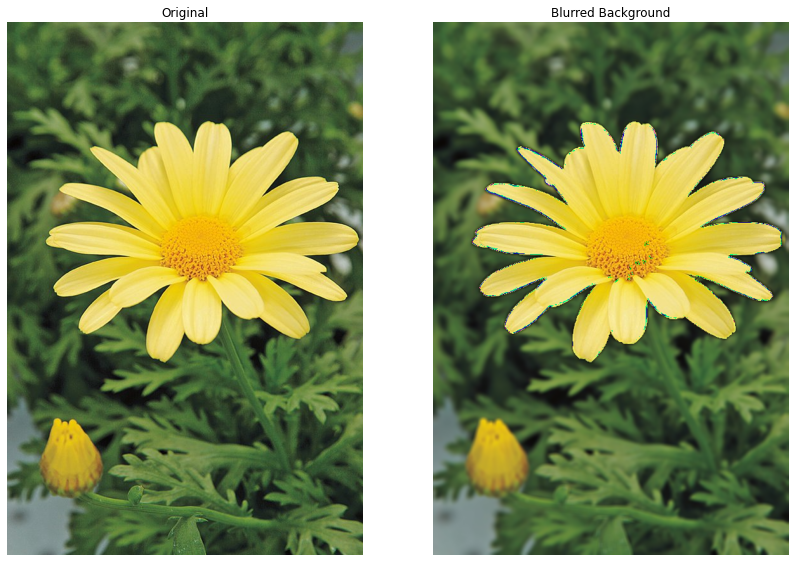

In [163]:
sigma = 4
BG_gauss = cv.GaussianBlur(BG,(7,7),sigma)

blurred_im= np.add(FG,BG_gauss)


First, Gaussian blur is applied to the background. Then blurred background and the foreground are added together using numpy.add function.

**(c)**

GrabCut algorithm cannot detect edges 100% precisely.So the mask is not completely accurate. Therefore some of the edge pixels that should be contained in the background are also present in the foreground. That pixels are darker.